In [1]:
#Data Manipulation
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
stop_words = stopwords.words("english")

#Machine learning libraries
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('user_tweets.csv')
df = df.drop(labels=['Unnamed: 0'], axis=1)
df.head()


,Tweets
0,b'@INCMP Chhattisgarh aur jharkhand ko option ...
1,b'What is trending on twitter is just shameful...
2,"b'Chinese propaganda videos (inventions,gym,fo..."
3,b'@CricCrazyJohns If he becomes then Wow'
4,b'Congress is the B of BJP @INCIndia @BJP4India'


In [3]:
ls = WordNetLemmatizer()
tweets = []
total_words = []
for i in range(len(df)):
    sentence = df["Tweets"][i]
    sentence = sentence.lower()
    sentence = sentence.replace("\\n", "")
    sentence = re.sub(
        r'https://t.co/\w+|(x\w\w)|#\w+|&amp', ' ', sentence)

    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub('b\s', ' ', sentence)

    total_words.extend([word for word in sentence.split() if len(word) > 2])
    sentence = sentence.split()
    sentence = [ls.lemmatize(
        word) for word in sentence if word not in stop_words and len(word) > 2]
    # if word not in stop_words and len(word) > 2
    sentence = ' '.join(sentence)
    tweets.append(sentence)
total_words = ' '.join(total_words)


In [4]:
df['clean_tweets'] = tweets
df['clean_tweets'].head()


0    incmp chhattisgarh aur jharkhand option rkha w...
1                           trending twitter shamefull
2    chinese propaganda video invention gym food in...
3                           criccrazyjohns becomes wow
4                      congress bjp incindia bjp india
Name: clean_tweets, dtype: object

(array([14., 23., 17., 21., 16., 12., 14., 13.,  7.,  6.,  6.,  7.,  4.,
         1.,  5.,  2.,  3.,  3.,  2.,  2.]),
 array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
         90.9, 101. , 111.1, 121.2, 131.3, 141.4, 151.5, 161.6, 171.7,
        181.8, 191.9, 202. ]),
 <BarContainer object of 20 artists>)

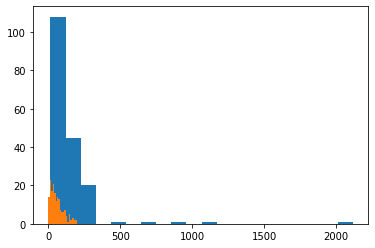

In [5]:
plt.hist(df['Tweets'].str.len(), bins=20, label='Tweets')
plt.hist(df['clean_tweets'].str.len(), bins=20, label='Clean Tweets')


In [6]:
polar_values = []
for tweet in tweets:
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    # for senti, sc in score.items():
    neg = score['neg']
    pos = score['pos']
    if neg > pos:
        polar_values.append(float(score['neg']*-1))
    elif pos > neg:
        polar_values.append(float(score['pos']))
    else:
        polar_values.append(0)


In [7]:
df['Sentiment'] = polar_values


In [23]:
positive_tweets = []
negative_tweets = []
neutral_tweets = []
negative_tweets_view=[]

neg=0
pos=0
for i in range(len(df)):
    if df['Sentiment'][i] > 0:
        positive_tweets.append(df['clean_tweets'][i])
        pos+=1
    elif df['Sentiment'][i] < 0:
        negative_tweets.append(df['clean_tweets'][i])
        negative_tweets_view.append(df['Tweets'][i])
        neg+=1
    else:
        neutral_tweets.append(df['clean_tweets'][i])


In [24]:
df.head(2)

,Tweets,clean_tweets,Sentiment
0,b'@INCMP Chhattisgarh aur jharkhand ko option ...,incmp chhattisgarh aur jharkhand option rkha w...,0.0
1,b'What is trending on twitter is just shameful...,trending twitter shamefull,0.0


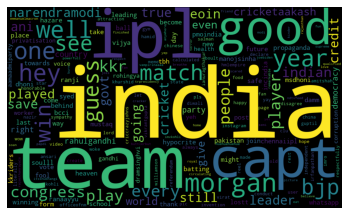

In [25]:
pos_word_cloud_text = []
for sentence in positive_tweets:
    sentence = [word for word in sentence.split()]
    pos_word_cloud_text.extend(sentence)
pos_word_cloud_text = ' '.join(pos_word_cloud_text)

wc = WordCloud(width=1000, height=600).generate(pos_word_cloud_text)
plt.imshow(wc)
plt.axis('off')
plt.show()


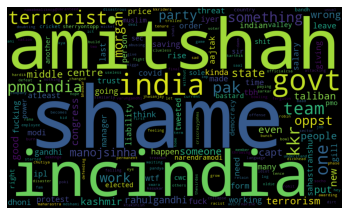

In [26]:
neg_word_cloud_text = []
for sentence in negative_tweets:
    sentence = [word for word in sentence.split()]
    neg_word_cloud_text.extend(sentence)
neg_word_cloud_text = ' '.join(neg_word_cloud_text)

wc = WordCloud(width=1000, height=600).generate(neg_word_cloud_text)
plt.imshow(wc)
plt.axis('off')
plt.show()


In [30]:
tweet_final=[]
for tweet in negative_tweets_view:
    tweet = re.sub(r'x\w\w|\\n|\\|https://t.co/\w+|#\w+', '', tweet)
    tweet = tweet.replace("b'", '').replace(
        'b"', '').replace("'", '').replace("\n", '').strip()
    tweet_final.append(tweet)

tweet_final

['@varungandhi80 Shame shame shame....its fucking treason...why your party awarding her...10-15saal baad log jb dekhnge tb ka v socho..."',
 'This idiot is shame for the nation...',
 '@nawabmalikncp Lets put some dirt in their eyes...."',
 'is kinda weird as usual...Ipl is more imp than T20 WC.. doubting rohit even before his permanent tenure started... Whats wrong Oldie"',
 '@thevirdas Tbh no offense....but chutiya ho kya??',
 'Attacking ict for defending @MdShami11 ...The one who are doing this are the ones who were abusing him before...The language is changed .. .."',
 'The others who work are working from home...Thats the deal @INCIndia needs to understand...Govt employees kids are the ones who are working for It and other Work from sector companies...they dont give a fuck about the price rise...and the ones who are waiting for govt jobs"',
 'Where is the protest on price rise...not by the oppst parties...they are useless in India now...But by the people who are paying?? covid is n

In [33]:
neg_dataset=pd.DataFrame(negative_tweets,columns=['Tweet'])
neg_score=[]
for i in range(len(neg_dataset)):
    score=SentimentIntensityAnalyzer().polarity_scores(neg_dataset['Tweet'][i])
    neg_score.append(float(score['neg']*-1))
neg_dataset['Clean_Tweet']=tweet_final
neg_dataset['Polarity']=neg_score
neg_dataset=neg_dataset.sort_values(by=['Polarity'],ascending=True)
neg_dataset['Clean_Tweet']


1                 This idiot is shame for the nation...
14                               @OfficialCSA is racist
47                                    @AOC is bitch....
8                                @CricCrazyJohns Wtf...
12                          Bunch of dickheads...  poki
27    @Kisanektamorcha @aajtak @KuldipBJP @aajtak sh...
45      Sick people should pack their bags and leave...
13       Burn terrorist in Kashmir  @PMOIndia @AmitShah
49    Just make Siddhu cm ...and face the allegation...
11           Swara Bhaskar etence is a shame for all ..
24    Has rcb tweeted about their to fans/wanna be i...
54    @Yasir_HameedQ A country which believes in goo...
26    @RoflGandhi_ @JoeBiden Tbh wtf you just tweete...
0     @varungandhi80 Shame shame shame....its fuckin...
22    @RanaAyyub Because we have many topics of Isla...
43       Remove illegal mosques,temples and churches...
46    Now as there is no funding for iron dome...  s...
5     Attacking ict for defending @MdShami11 ...

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}